In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
#Task a

#Define Variables and create grid space for Paricle in a box
h=1
m=1
L=1.0
n=2000                               #Number of points 
grid= np.linspace(-L/2, L/2, n)


In [4]:
#task b

def Laplacian(n):
    """
    Computes the Laplacian operator based on number of points in grid.
    
    Parameters:
    n (int): Number of points on the grid. 
    
    
    Returns:
    Array: Laplacian Matrix.
    """
    I=np.identity(n)                          #Create an identity Matrix of n points
    sup_diag=np.diag(np.ones(n-1),1)          #Create a super diagonal with "1" above diagonal
    sub_diag=np.diag(np.ones(n-1),-1)         #Create a sub diagonal with "1" below diagonal
    I_off=sup_diag+sub_diag                   #Create off diagonal
    dx=(1 / (n-1))                            #Delta x of grid
    laplacian=(1/(dx**2))*(-2*I+I_off)        #Calculate the Laplacian
    return laplacian



In [5]:
#task c

H= (-h**2/(2*m)) * Laplacian(n)                     #Construct the Hamiltonian Matrix


In [9]:
#task d
#Solve for Eigenvalues and Eigenfunctions

eigenvalues, eigenvectors = np.linalg.eig(H)               #Calculate eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)                   #Sort eigenvalues by their indices
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


first_seven_eigenvalues = eigenvalues[:7]                         #Extract first seven eigenvalues and eigenvectors
first_seven_eigenvectors = eigenvectors[:, sorted_indices[:7]]

print(first_seven_eigenvalues)



[  4.92494145  19.69975365  44.32440018  78.79882035 123.12292918
 177.29661742 241.31975153]


Normalization Wavefunction 1 : 1.0
Normalization Wavefunction 2 : 1.0
Normalization Wavefunction 3 : 1.0
Normalization Wavefunction 4 : 1.0
Normalization Wavefunction 5 : 1.0


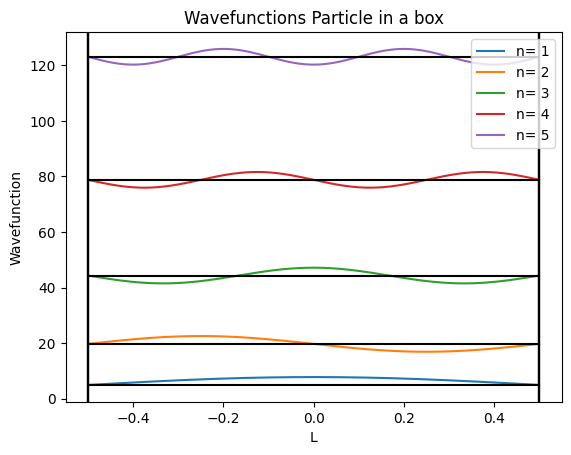

In [20]:
# task e
#Plot 

x=grid
dx= (grid[1]-grid[0])                                                   #Find volume of integration (1D)
for i in range(5):                                                      #Plot First 5 wavefunctions
    wavefunction= -eigenvectors[:, i]                                   #Extract eigenvector i
    wavefunction= wavefunction/(np.sqrt(np.sum(wavefunction**2)*dx))    #Normalize Wavefunction
    Normalization=(np.sum(wavefunction*wavefunction*dx))                #Check Normalization
    print("Normalization Wavefunction",i+1,":", Normalization)
    y=2*wavefunction+eigenvalues[i]                                     #Multiply wavefunction by weight to ease visualization and add energy level
    plt.plot(x,y, label=f"n= {i+1}")                                    #Plot wavefunctions
    plt.axvline(x=L/2, color='black', linestyle='-')                    #Create box
    plt.axvline(x=-L/2, color='black', linestyle='-')
    plt.hlines(eigenvalues[i],-L/2, L/2, color="black")                 #Plot energy Level

plt.title("Wavefunctions Particle in a box")
plt.xlabel("L")
plt.ylabel("Wavefunction")
plt.legend()
plt.show()

